<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [216]:
# Check for GPU
!nvidia-smi

Tue Nov 11 15:18:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 Ti     On  |   00000000:01:00.0 Off |                  N/A |
|  0%   54C    P8             12W /  290W |     261MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [217]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.9.0+cu128


## 1. What are 3 areas in industry where computer vision is currently being used?

### 🏭 1. **Manufacturing & Quality Control**

* **Use:** Automated inspection systems analyze products on assembly lines to detect defects, measure dimensions, or check alignment.
* **Example:** Detecting scratches or imperfections on car parts, chips, or bottles before packaging.
* **Benefit:** Improves quality assurance and reduces the need for manual inspection.


### 🏥 2. **Healthcare & Medical Imaging**

* **Use:** Analyzing medical images such as X-rays, MRIs, or CT scans to detect diseases like cancer, fractures, or infections.
* **Example:** AI tools that identify tumors or diabetic retinopathy from retinal scans.
* **Benefit:** Supports doctors with faster and more accurate diagnoses.


### 🚗 3. **Automotive & Transportation**

* **Use:** Used in **autonomous vehicles** and **driver assistance systems** to detect pedestrians, traffic signs, lanes, and other vehicles.
* **Example:** Tesla's Autopilot or lane-departure warning systems.
* **Benefit:** Enhances safety and enables self-driving technology.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [218]:
from torchvision import datasets, transforms

# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [219]:
len(training_data), len(test_data)

(60000, 10000)

In [220]:
classes = training_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [221]:
targets = training_data.targets
targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [222]:
img, label = training_data[0]
img.shape

torch.Size([1, 28, 28])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

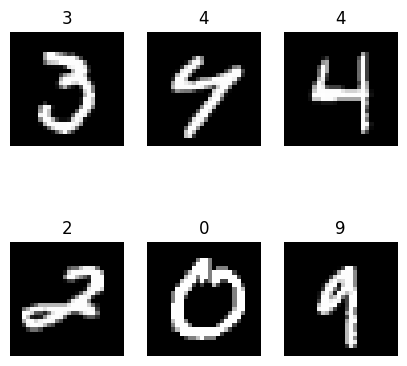

In [223]:
import random, matplotlib.pyplot as plt
row, col = 2, 3
fig = plt.figure(figsize=(5,5))
for i, (img, label) in enumerate(random.sample(list(training_data), 6)):
    fig.add_subplot(row, col, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(label)
    plt.axis('off')

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [224]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)   

In [225]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [226]:
from torch import nn
class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" | "same" | int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, 
                      hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there are 7x7 image sizes
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x                   

In [227]:
model_1 = MNISTModel(1,10,len(classes))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [228]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [229]:
def print_train_time(start: float, 
                     end: float, 
                     device: torch.device = None):
    '''
    Prints difference between start and end time.
    '''
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [230]:
len(train_dataloader.dataset), len(train_dataloader)

(60000, 1875)

In [231]:
from pathlib import Path
import requests
if Path("helper_functions.py").is_file():
    print("helper_functions.py already downloaded skipping download")
else:
    print("downloading helper_functions.py")
    request = requests.get("https://github.com/JoachimLombardi/Helper_functions/blob/master/Untitled3.ipynb")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already downloaded skipping download


In [232]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [233]:
def train_test_step(model: torch.nn.Module = model_1, 
                    train_dataloader: torch.utils.data.DataLoader = train_dataloader, 
                    test_dataloader: torch.utils.data.DataLoader = test_dataloader, 
                    loss_fn: torch.nn.Module = loss_fn, 
                    optimizer: torch.optim.Optimizer = optimizer, 
                    accuracy_fn: torch.nn.Module = accuracy_fn, 
                    device = "cpu"):
    torch.manual_seed(42)
    train_start = timer()
    epochs = 3
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch}\n-------")
        train_loss = 0
        train_acc = 0
        for batch, (X,y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)
            model.train().to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)
        test_loss = 0
        test_acc = 0
        model.eval().to(device)
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                test_pred = model(X)
                test_loss += loss_fn(test_pred, y)
                test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
        print(f"Train loss: {train_loss:.3f} | Train accuracy: {train_acc:.2f}%")
        print(f"Test loss: {test_loss:.3f} | Test accuracy: {test_acc:.2f}%")
    train_end = timer()
    print_train_time(start=train_start,
                     end=train_end,
                     device=str(next(model.parameters()).device))

In [235]:
train_test_step()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.045 | Train accuracy: 98.58%
Test loss: 0.045 | Test accuracy: 98.43%
Epoch 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.039 | Train accuracy: 98.74%
Test loss: 0.043 | Test accuracy: 98.50%
Epoch 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.035 | Train accuracy: 98.87%
Test loss: 0.046 | Test accuracy: 98.63%
Train time on cpu: 33.856 seconds


In [234]:
train_test_step(device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.248 | Train accuracy: 91.86%
Test loss: 0.067 | Test accuracy: 97.72%
Epoch 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.069 | Train accuracy: 97.89%
Test loss: 0.051 | Test accuracy: 98.40%
Epoch 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.053 | Train accuracy: 98.30%
Test loss: 0.056 | Test accuracy: 98.02%
Train time on cuda:0: 10.983 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

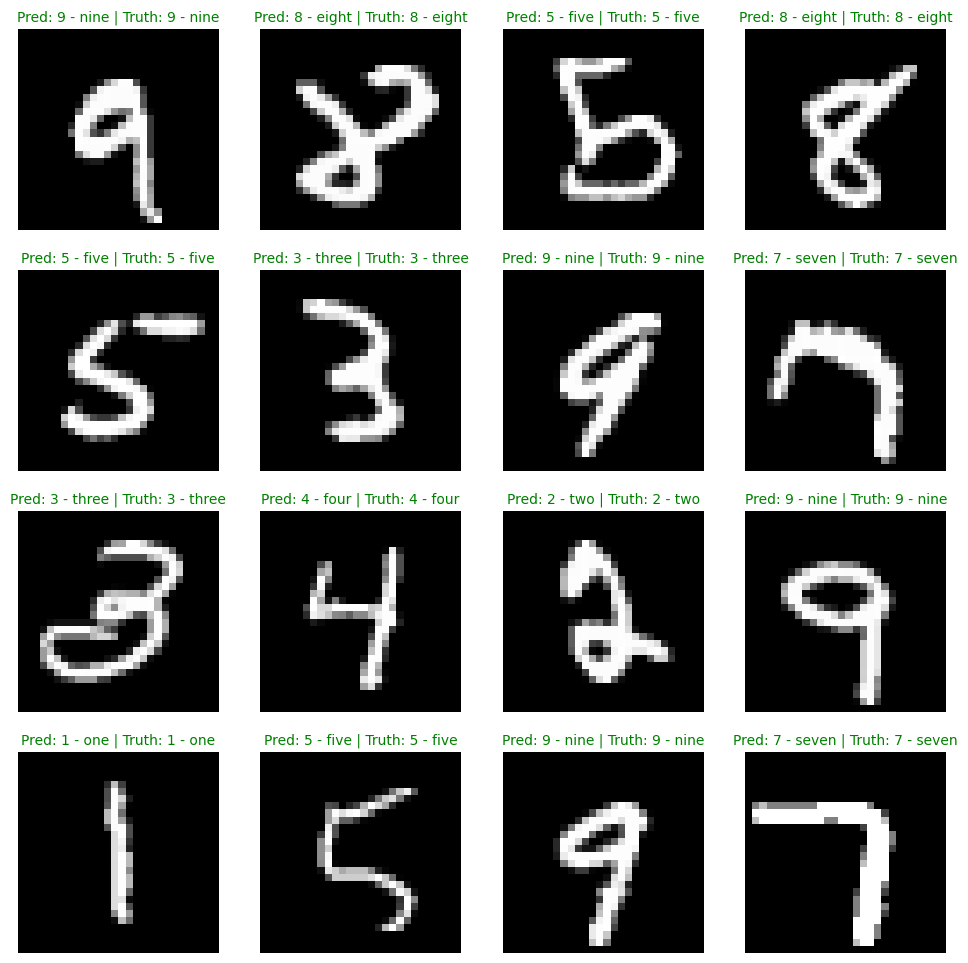

In [163]:
fig = plt.figure(figsize=(12, 12))
row, col = 4, 4
model_1.eval().to(device)
with torch.inference_mode():
    for i, (data, label) in enumerate(random.sample(list(test_data), k=row*col)):
        data = torch.unsqueeze(data, dim=0).to(device)
        pred_logit = model_1(data)
        pred_classes_idx = pred_logit.argmax(dim=1)
        pred_classe = classes[pred_classes_idx]
        actual_classe = classes[label]
        fig.add_subplot(row, col, i+1)
        plt.imshow(data.squeeze().cpu(), cmap='gray')
        title = f"Pred: {pred_classe} | Truth: {actual_classe}"
        if pred_classe == actual_classe:
            plt.title(title, fontsize = 10, c="g")
        else:
            plt.title(title, fontsize = 10, c="r")
        plt.axis('off')
    plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_1.eval().to(device)
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_1(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = y_logit.argmax(dim=1) 
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([[ -2.4187,   0.5253,   3.4457,   3.2795,  -7.4130,  -2.9005, -17.6383,
          16.5360,   1.5574,   6.1031],
        [  2.8457,   3.4536,  17.2700,  -0.7094,  -7.4078,  -5.1641,   1.2572,
          -5.5760,   1.7073,  -7.5943],
        [ -5.2170,   9.6483,  -0.5449,  -4.9165,   2.1550,  -0.9648,  -0.5329,
          -0.1501,   0.8836,  -2.1938],
        [ 18.4737, -10.4913,   2.3461,  -8.2592,  -4.7065,   0.0548,   7.5779,
          -4.5818,   2.9842,  -1.3675],
        [ -4.7443,  -2.1016,  -3.6674,  -6.2536,  17.6945,  -1.5456,  -1.9215,
          -3.4994,   0.7734,   5.0892],
        [ -5.5745,  11.5381,  -0.7243,  -6.7575,   3.6802,  -4.0107,  -1.8041,
           0.2595,   2.3052,  -1.0890],
        [-13.4381,   0.4502,  -4.9795,  -5.9896,  17.0784,   4.1369,  -4.9929,
          -4.3235,   7.1983,   4.7235],
        [ -5.7723,  -2.9941,  -0.3033,  -3.9115,   8.1281,   1.9847,  -6.4925,
          -6.3056,   3.2409,  13.9169],
        [ -0.9604, -13.6542,  -5.0651,  -5.1363,

In [103]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

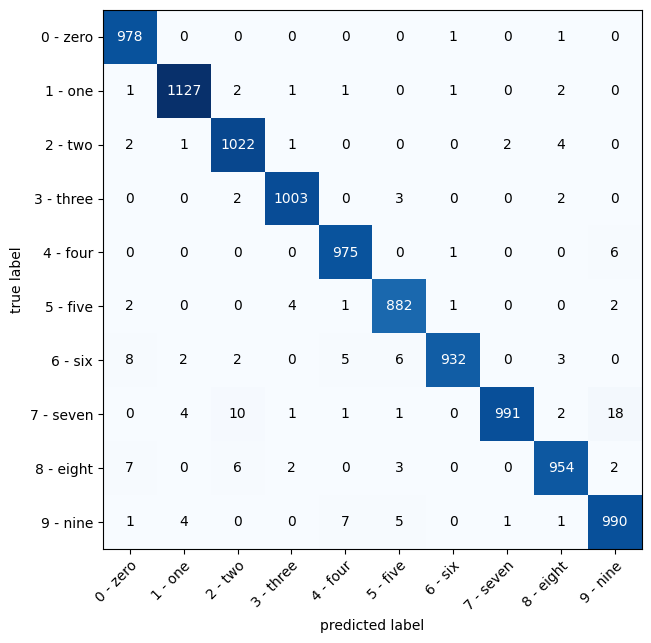

In [167]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=classes, # turn the row and column labels into class names
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [191]:
random_tensor = torch.rand(size=(1,3,64,64))
layer_conv = nn.Conv2d(in_channels=3,
                       out_channels=25,
                       kernel_size=4,
                       stride=1,
                       padding=0)
layer_conv(random_tensor).shape

torch.Size([1, 25, 61, 61])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

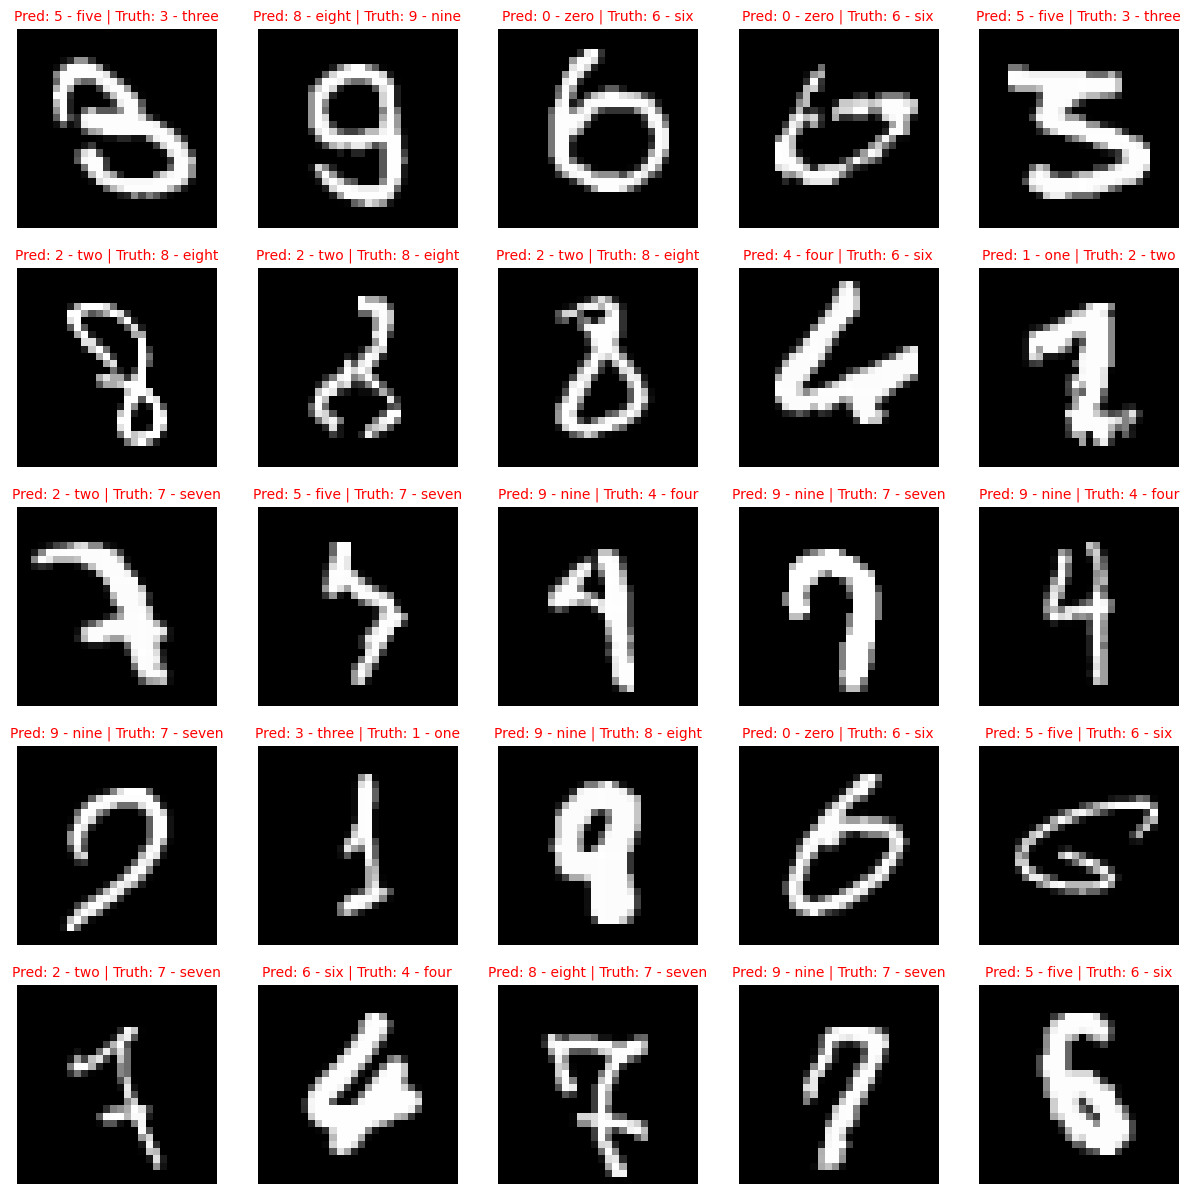

In [209]:
fig = plt.figure(figsize=(15, 15))
row, col = 5, 5
i = 0
preds_classes_idx = torch.tensor([]).to(device)
model_1.eval().to(device)
with torch.inference_mode():
    for data, label in test_data:
        data = torch.unsqueeze(data, dim=0).to(device)
        pred_logit = model_1(data)
        pred_classes_idx = pred_logit.argmax(dim=1)
        preds_classes_idx = torch.cat((preds_classes_idx, pred_classes_idx))
        pred_classe = classes[pred_classes_idx]
        actual_classe = classes[label]
        title = f"Pred: {pred_classe} | Truth: {actual_classe}"
        if pred_classe != actual_classe and i < row*col:
            fig.add_subplot(row, col, i+1)
            plt.imshow(data.squeeze().cpu(), cmap='gray')
            plt.title(title, fontsize = 10, c="r")
            i += 1
        plt.axis('off')
    plt.show()

In [215]:
torch.ne(preds_classes_idx, test_data.targets.to(device)).sum(dim=0)

tensor(146, device='cuda:0')